In [1]:
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base.transfer import EminGeV, EmaxGeV
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c

In [2]:
m, g = 10., 3.
alp = ALP(m, g)

In [3]:
EGeV = np.logspace(0.,8.,1000)

In [4]:
pin = np.diag((1., 0., 0.))

In [5]:
src = Source(z=0., l=0., b=0.)

In [6]:
ml = ModuleList(alp, src, pin=pin, EGeV=EGeV, seed=0)

In [16]:
ml.add_propagation(environ='ICMCell',
                   order=0,   # order of the module
                   B0=1.,  # B field strength
                   L0=10.,  # cell size
                   nsim=1,  # one single realization
                   n0=1e-3,  # electron density
                   r_abell=10.1,  # full path, chosen that we only have a single cell
                   beta=0.,
                   eta=0.
                  )

In [8]:
ml.modules[0].psin = np.ones_like(ml.modules[0].psin) * np.pi / 2.

In [9]:
px, py, pa = ml.run()

Text(0, 0.5, '$P_{a\\gamma}$')

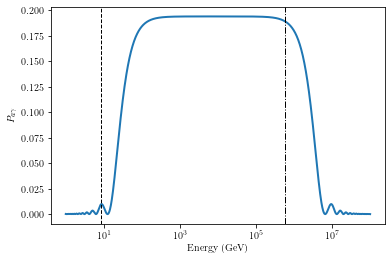

In [31]:
plt.semilogx(EGeV, pa[0], lw=2)
#plt.semilogx(EGeV, pa_arr[0], lw=1)

# the critical energy, onset of strong mixing regime
plt.axvline(EminGeV(m_neV=ml.alp.m, g11=ml.alp.g, BmuG=ml.modules[0].B, n_cm3=ml.modules[0].nel),
            lw=1., ls='--', color='k')

# maximum energy, end of strong mixing regime
plt.axvline(EmaxGeV(g11=ml.alp.g, BmuG=ml.modules[0].B),
            lw=1., ls='-.', color='k')

plt.xlabel("Energy (GeV)")
plt.ylabel("$P_{a\gamma}$")

In [18]:
ml.modules['ICMCell'].r

array([5.])

In [29]:
ml_array = ModuleList(alp, src, pin=pin, EGeV=EGeV, seed=0)
ml_array.add_propagation('Array', 0, Btrans=np.array([1]), psi=np.array([np.pi/2]), nel=np.array([1e-3]), dL=np.array([10]))
px_arr, py_arr, pa_arr = ml_array.run()

In [ ]:
Btrans, psi, nel, dL